<a href="https://colab.research.google.com/github/sriprad/2017Spring/blob/master/Practice_Pycaret_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pycaret

     |████████████████████████████████| 194kB 3.3MB/s 
     |████████████████████████████████| 63.9MB 59kB/s 
     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 266kB 38.4MB/s 
     |████████████████████████████████| 389kB 35.5MB/s 
     |████████████████████████████████| 3.1MB 45.3MB/s 
     |████████████████████████████████| 133kB 37.6MB/s 
     |████████████████████████████████| 1.6MB 40.7MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 7.0MB 24.7MB/s 
     |████████████████████████████████| 1.2MB 41.5MB/s 
     |████████████████████████████████| 235kB 38.1MB/s 
     |████████████████████████████████| 2.1MB 36.8MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 6.2MB 36.8MB/s 
     |████████████████████████████████| 604kB 37.5MB/s 
     |████████████████████████████████| 552kB 34.1MB/s 
 

In [0]:
from pycaret.utils import version

In [2]:
version()

1.0.0


In [0]:
import pandas as pd

FileNotFoundError: ignored

NameError: ignored

In [11]:
from google.colab import files
uploaded = files.upload()

Saving loan_train_data.csv to loan_train_data.csv


In [14]:
print (uploaded['loan_train_data.csv'][:200].decode('utf-8') + '...')

ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1129,30,5,171,94025,2,1.9,2,0,1,...


In [16]:
import pandas as pd
import io

data_classification = pd.read_csv(io.StringIO(uploaded['loan_train_data.csv'].decode('utf-8')))
data_classification

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3598,56,26,51,92028,3,2.0,3,0,0,0,0,1,0
3996,4671,52,26,194,94305,1,1.7,1,0,0,0,0,1,0
3997,989,63,39,32,94998,1,1.9,2,100,0,0,0,0,0
3998,2038,35,8,52,95616,2,1.0,2,0,0,0,0,0,1


In [17]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [18]:
from pycaret import classification
classification_setup = classification.setup(data=data_classification,target='Personal Loan')

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:29:33
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
ID,Numeric
Age,Numeric
Experience,Numeric
Income,Numeric
ZIP Code,Numeric
Family,Categorical
CCAvg,Numeric
Education,Categorical
Mortgage,Numeric
Personal Loan,Label


KeyboardInterrupt: ignored

In [24]:
#build the decision tree
from pycaret import classification
classification_setup = classification.setup(data= data_classification, target='Personal Loan')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.985400,0.997100,0.884600,0.959800,0.920100,0.912000
1,CatBoost Classifier,0.985000,0.996900,0.869500,0.971400,0.916600,0.908400
2,Extreme Gradient Boosting,0.984600,0.995600,0.880900,0.956300,0.916400,0.908000
3,Light Gradient Boosting Machine,0.982100,0.996000,0.854700,0.955400,0.901200,0.891400
4,Random Forest Classifier,0.979600,0.973800,0.802800,0.982100,0.882500,0.871500
5,Extra Trees Classifier,0.978900,0.985000,0.798900,0.979600,0.878100,0.866700
6,Decision Tree Classifier,0.978600,0.933100,0.876900,0.899500,0.886700,0.874900
7,Ada Boost Classifier,0.963600,0.973300,0.728200,0.874900,0.790300,0.770700
8,Linear Discriminant Analysis,0.940700,0.957500,0.591500,0.743300,0.655500,0.623700
9,Ridge Classifier,0.937500,0.000000,0.371900,0.947800,0.528700,0.502600


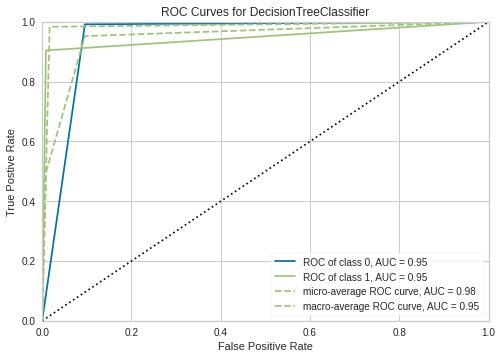

In [29]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')



In [26]:
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9714,0.9180,0.8519,0.8519,0.8519,0.8360
1,0.9893,0.9610,0.9259,0.9615,0.9434,0.9375
2,0.9893,0.9444,0.8889,1.0000,0.9412,0.9353
3,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541
4,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590
5,0.9679,0.8830,0.7778,0.8750,0.8235,0.8059
6,0.9821,0.9736,0.9630,0.8667,0.9123,0.9024
7,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958
8,0.9679,0.9326,0.8889,0.8000,0.8421,0.8243
9,0.9677,0.8787,0.7692,0.8696,0.8163,0.7987


In [30]:
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

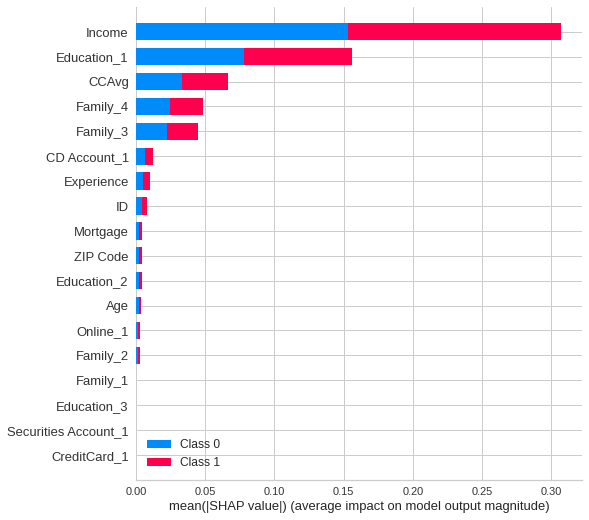

In [32]:
classification.interpret_model(classification_dt)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving loan_test_data.csv to loan_test_data.csv


In [34]:
print (uploaded['loan_test_data.csv'][:200].decode('utf-8') + '...')

ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0
1817,45,19,91,92373,2,1.7,2,0,0...


In [36]:
import pandas as pd
import io

test_data_classification = pd.read_csv(io.StringIO(uploaded['loan_test_data.csv'].decode('utf-8')))
test_data_classification

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0


In [37]:
# make predictions
predictions = classification.predict_model(classification_dt, data=test_data_classification)
# view the predictions
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0


In [38]:
# save the model
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


In [39]:
# load model
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Sucessfully Loaded
